# Προπτυχιακό μάθημα: **Μηχανική Μάθηση**
## 1η Σειρά Ασκήσεων
### Θέμα: Ταξινόμηση δεδομένων (Data Classification)

#Βασίλειος Παπακυριάκου, 5324
#Δανάη Χανλαρίδου, 5386

## **[Α]. (διανυσματική αναπαράσταση)**

**Imports + load dataset**

In [1]:
!pip install torch torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Fashion MNIST dataset
fashion_mnist = fetch_openml(name='Fashion-MNIST')


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Organizing and visualizing data**

In [2]:
X = fashion_mnist.data.astype('float32')
y = fashion_mnist.target.astype('int64')

# Split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to vectors
X_train_vectorized = X_train_pooled.reshape(len(X_train_pooled), -1)
X_test_vectorized = X_test_pooled.reshape(len(X_test_pooled), -1)

# Define model parameters
K_VALUES = [1, 3, 5]
C_VALUES = [1, 10, 100]
RBF_VALUES = [0.02, 0.1, 1]
NUM_EPOCHS = 100
BATCH_SIZE = 50

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxS

**Μax pooling**

In [ ]:
# Apply max pooling gradually to obtain 4x4 images
X_train_pooled = X_train.reshape(-1, 28, 28)
X_test_pooled = X_test.reshape(-1, 28, 28)

# Apply max pooling from 28x28 to 14x14
X_train_pooled = X_train_pooled.reshape(-1, 14, 2, 14, 2).max(axis=(2, 4))
X_test_pooled = X_test_pooled.reshape(-1, 14, 2, 14, 2).max(axis=(2, 4))

# Apply max pooling from 14x14 to 7x7
X_train_pooled = X_train_pooled.reshape(-1, 7, 2, 7, 2).max(axis=(2, 4))
X_test_pooled = X_test_pooled.reshape(-1, 7, 2, 7, 2).max(axis=(2, 4))

**Creating Models**

In [ ]:
models = {}

# ΚNN Classifier
for k in K_VALUES:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vectorized, y_train)
    models[f'KNN (K={k})'] = knn

In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train_vectorized, y_train)
models['Decision Tree'] = dtc

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_vectorized, y_train)
models['Random Forest'] = rfc

In [ ]:
# Linear SVM Classifier
for c in C_VALUES:
    svm_linear = SVC(kernel='linear', C=c, max_iter=500)
    svm_linear.fit(X_train_vectorized, y_train)
    models[f'Linear SVM (C={c})'] = svm_linear

In [ ]:
# SVM with RBF Kernel Classifier
for gamma in RBF_VALUES:
    svm_rbf = SVC(kernel='rbf', gamma=gamma, max_iter=500)
    svm_rbf.fit(X_train_vectorized, y_train)
    models[f'SVM RBF (gamma={gamma})'] = svm_rbf

**Plot Classifier Results for KNN (K = 1, 3, 5)**

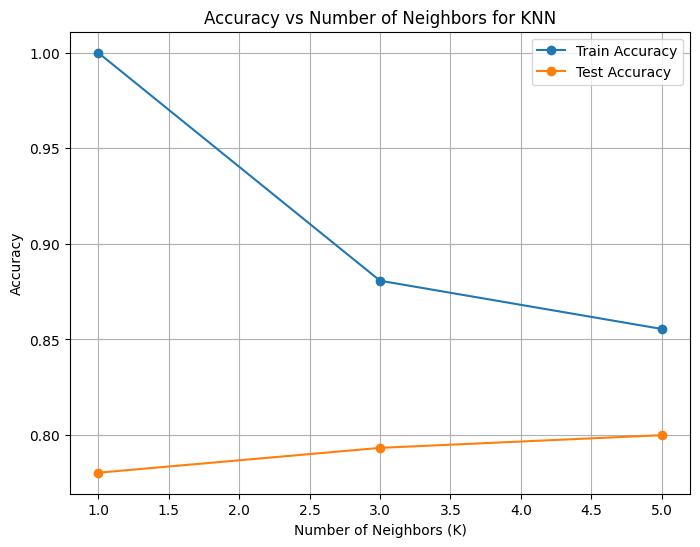

In [3]:
train_accuracies = []
test_accuracies = []

for k in K_VALUES:
    model_name = f"KNN (K={k})"

    # Get the model from the dictionary
    model = models[model_name]

    # Calculate accuracy on training and test data
    train_accuracy = model.score(X_train_vectorized, y_train)
    test_accuracy = model.score(X_test_vectorized, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(K_VALUES, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(K_VALUES, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors for KNN')
plt.legend()
plt.grid(True)
plt.show()



H επίδοση του Nearest Neighbor Classifier στο Fashion-MNIST dataset
μπορεί να είναι ικανοποιητική, αλλά εξαρτάται σημαντικά από τη
συγκεκριμένη διαμόρφωση του προβλήματος και τις επιλογές των
υπερπαραμέτρων.  Από το διάγραμμα, παρατηρούμε πως όσο αυξάνεται ο
αριθμός Κ γειτόνων, τόσο καλύτερη ακρίβεια έχουμε.

**Plot the Decision Tree with its features**

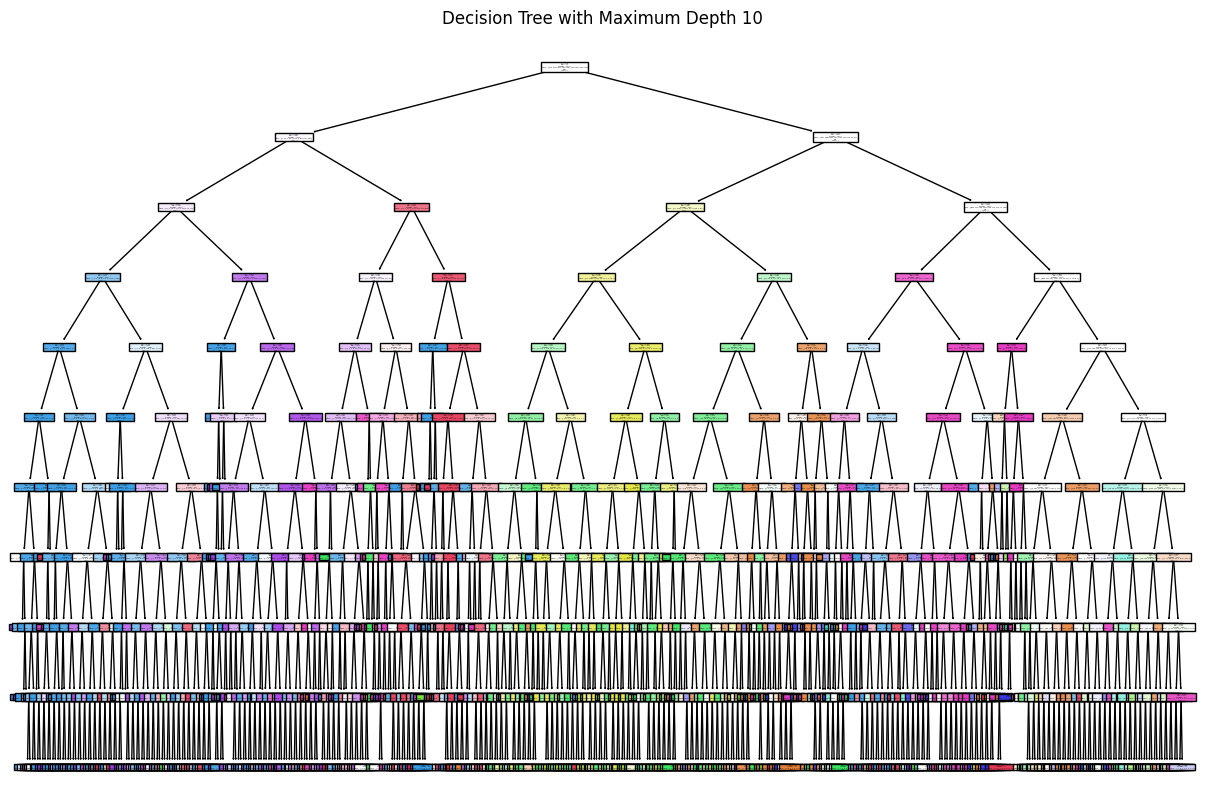

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))

# Adjust feature_names and class_names accordingly
plot_tree(dtc, filled=True, feature_names=[str(i) for i in range(X_train_vectorized.shape[1])], class_names=[str(i) for i in range(10)])
plt.title('Decision Tree with Maximum Depth 10')
plt.show()

**Plot Classifier Results for Decision Trees**

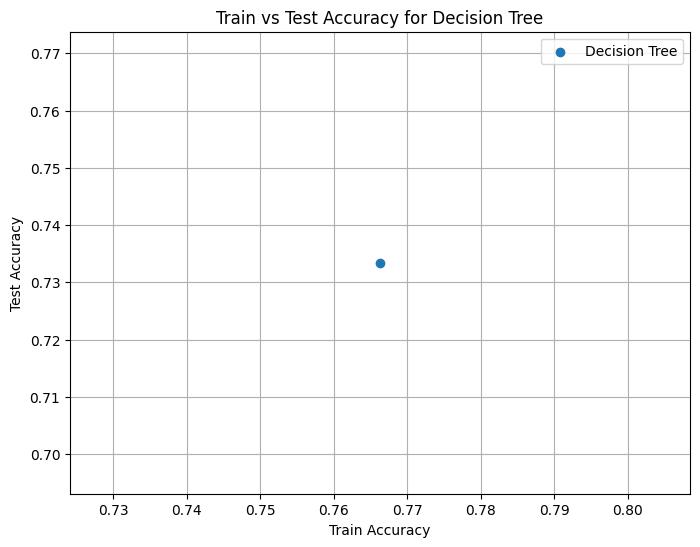

In [ ]:
plt.figure(figsize=(8, 6))

model_name = "Decision Tree"

model = models[model_name]

train_accuracy = model.score(X_train_vectorized, y_train)
test_accuracy = model.score(X_test_vectorized, y_test)

plt.scatter(train_accuracy, test_accuracy, label=model_name)

plt.xlabel('Train Accuracy')
plt.ylabel('Test Accuracy')
plt.title(f'Train vs Test Accuracy for {model_name}')
plt.legend()
plt.grid(True)
plt.show()

H επίδοση του Decision Tree εξαρτάται σε μεγάλο βαθμό από τη σωστή
επιλογή των υπερπαραμέτρων, όπως το μέγιστο βάθος (max depth) του
δέντρου. Εάν, το μέγιστο βάθος είναι πολύ μεγάλο, το δέντρο μπορεί να
υπερπροσαρμοστεί στα δεδομένα εκπαίδευσης και να έχει κακή γενίκευση
στα δεδομένα ελέγχου. Από την άλλη πλευρά, εάν το μέγιστο βάθος είναι
πολύ μικρή, το δέντρο μπορεί να μην είναι ικανό να μάθει την
πολυπλοκότητα των δεδομένων και να έχει υπο-επίδοση. Επίσης, η
οπτικοποίηση του δέντρου μπορεί να βοηθήσει στην κατανόηση των
αποφάσεων που λαμβάνει το μοντέλο. Από το διάγραμμα, παρατηρούμε
ότι η ακρίβεια της εκπαίδευσης είναι περίπου 0.765 ενώ η ακρίβεια του
ελέγχου είναι περίπου 0.735.

**Plot Classifier Results for Random Forests**

Training Accuracy for Random Forest: 1.0
Test Accuracy for Random Forest: 0.8358571428571429


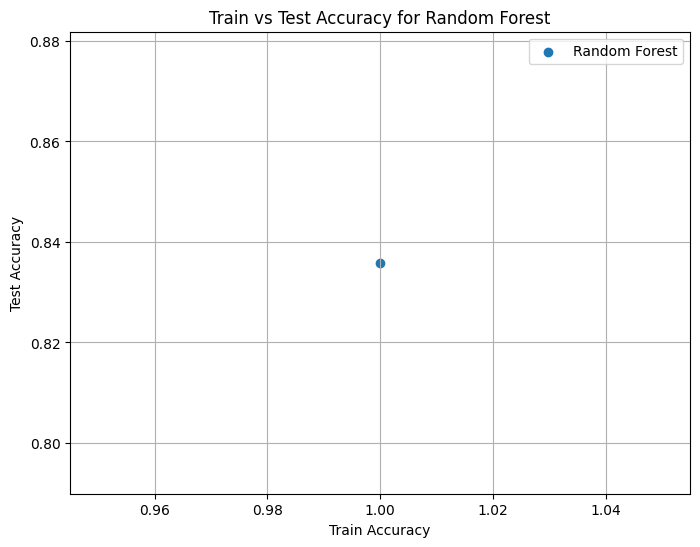

In [ ]:
# Define the model name
model_name = "Random Forest"

# Get the model from the dictionary
model = models[model_name]

# Calculate accuracy on training and test data
train_accuracy = model.score(X_train_vectorized, y_train)
test_accuracy = model.score(X_test_vectorized, y_test)

# Print accuracy
print(f'Training Accuracy for {model_name}: {train_accuracy}')
print(f'Test Accuracy for {model_name}: {test_accuracy}')

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(train_accuracy, test_accuracy, label=model_name)
plt.xlabel('Train Accuracy')
plt.ylabel('Test Accuracy')
plt.title(f'Train vs Test Accuracy for {model_name}')
plt.legend()
plt.grid(True)
plt.show()

Η επίδοση του Random Forest εξαρτάται από τις υπερπαραμέτρους του, όπως ο αριθμός των δέντρων και η μέγιστη βάθμωση (max depth) των δέντρων. Συνολικά, ο Random Forest είναι ένα ισχυρό μοντέλο που μπορεί να παράσχει αξιόπιστες προβλέψεις για το Fashion-MNIST dataset. Από το διάγραμμα, μπορούμε να παρατηρήσουμε ότι η ακρίβεια της εκπαίδευσης είναι 1 ακριβώς ενώ η ακρίβεια του ελέγχου είναι περίπου 0.84, δηλαδή μια αρκετά καλή πρόσεγγιση.

**Plot Classifier Results for SVMs (C = {1, 10, 100})**

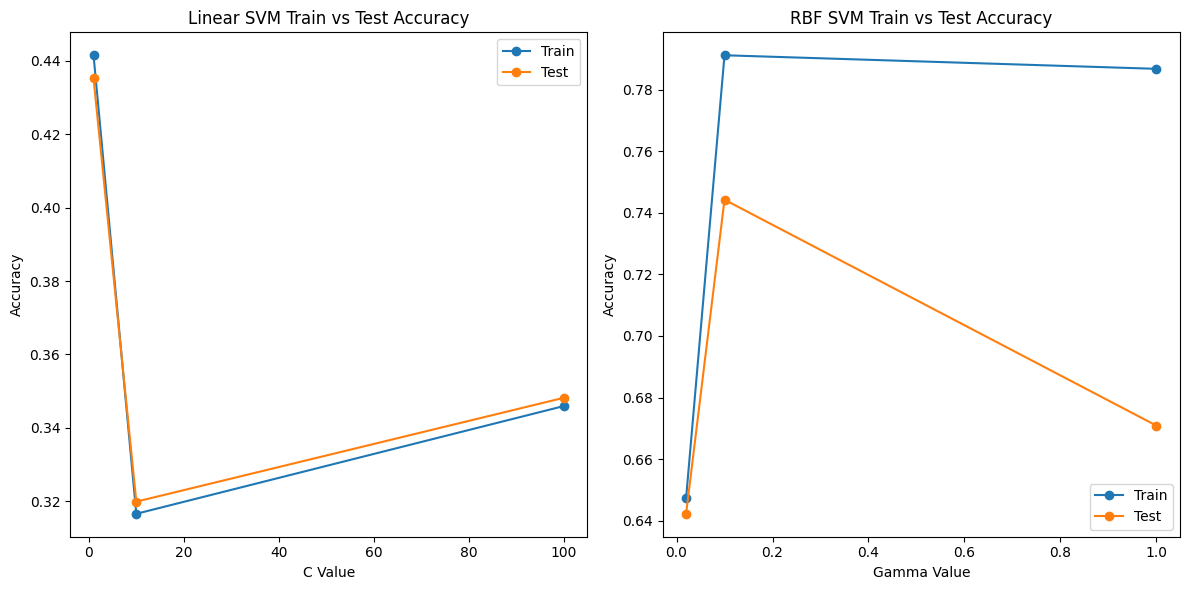

In [ ]:
# Calculate train and test accuracies for SVM models
svm_linear_train_accuracies = []
svm_linear_test_accuracies = []
svm_rbf_train_accuracies = []
svm_rbf_test_accuracies = []

for c in C_VALUES:
    svm_linear = models[f'Linear SVM (C={c})']
    train_accuracy = svm_linear.score(X_train_vectorized, y_train)
    test_accuracy = svm_linear.score(X_test_vectorized, y_test)
    svm_linear_train_accuracies.append(train_accuracy)
    svm_linear_test_accuracies.append(test_accuracy)

for gamma in RBF_VALUES:
    svm_rbf = models[f'SVM RBF (gamma={gamma})']
    train_accuracy = svm_rbf.score(X_train_vectorized, y_train)
    test_accuracy = svm_rbf.score(X_test_vectorized, y_test)
    svm_rbf_train_accuracies.append(train_accuracy)
    svm_rbf_test_accuracies.append(test_accuracy)

# Plot SVM train vs test accuracies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(C_VALUES, svm_linear_train_accuracies, marker='o', label='Train')
plt.plot(C_VALUES, svm_linear_test_accuracies, marker='o', label='Test')
plt.title('Linear SVM Train vs Test Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(RBF_VALUES, svm_rbf_train_accuracies, marker='o', label='Train')
plt.plot(RBF_VALUES, svm_rbf_test_accuracies, marker='o', label='Test')
plt.title('RBF SVM Train vs Test Accuracy')
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Για το Fashion-MNIST dataset, ο γραμμικός ταξινομητής SVM με διάφορες τιμές της παραμέτρου C μπορεί να επιτύχει καλή ακρίβεια, αλλά είναι σημαντικό να επιλεγεί η βέλτιστη τιμή της παραμέτρου C μέσω διασταύρωσης για να αποφευχθεί η υπερ-ή υπο-προσαρμογή. Από το πρώτο διάγραμα, παρατηρούμε ότι για κάθε τιμή του C η ακρίβεια της εκπαίδευσης και του ελέγχου ταυτίζονται σε μεγάλο βαθμό. Ο SVM με πυρήνα RBF μπορεί να παρέχει υψηλή ακρίβεια στο Fashion-MNIST dataset λόγω της ικανότητάς του να αναγνωρίζει πολύπλοκα πρότυπα στα δεδομένα. Η απόδοσή του εξαρτάται σημαντικά από την υπερπαράμετρο γ (gamma), η οποία ελέγχει την επίδραση του κάθε δείγματος στην απόφαση του μοντέλου. Από το διάγραμμα, παρατηρούμε ότι όσο μεγαλώνει η παράμετρος γ τόσο χειροτερεύει η ακρίβεια μεταξύ της εκπαίδευσης και του ελέγχου. Η καλύτερη τιμή της παραμέτρου γ φαίνεται να είναι η 0.02 κατά την οποία η ακρίβεια ελέγχου είναι περίπου 0.64 και η ακρίβεια εκπαίδευσης περίπου 0.65, ενώ για τις τιμές 0.1 και 1  υπάρχει μεγαλύτερη απόκλιση μεταξύ ακρίβεια ελέγχου και εκπαίδευσης. Ως επιλογή μεθόδου ταξινόμησης φαίνεται να είναι καλύτερη η πρώτη καθώς για όλες τις τιμές υπάρχει καλύτερη προσέγγιση.

**Configure and create network**

Η συμπεριφορά του νευρωνικού δικτύου εξαρτάται σημαντικά από την αρχιτεκτονική του (πλήθος επιπέδων, πλήθος νευρώνων κλπ.) και τις υπερπαραμέτρους του (όπως ο ρυθμός μάθησης, η παράμετρος επαύξησης κλπ.). Η επιτυχία του νευρωνικού δικτύου εξαρτάται επίσης από τον τρόπο εκπαίδευσής του, την αποφυγή της υπερ-προσαρμογής και τη βελτιστοποίηση των υπερπαραμέτρων. Εκπαιδεύουμε το δίκτυο με 100 εποχές και batch size 50.

In [ ]:
# Neural Network (feed-forward)
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(49, 100)  # first hidden layer, 100 neurons
    self.fc2 = nn.Linear(100, 100)  # second hidden layer, 100 neurons
    self.fc3 = nn.Linear(100, 50)  # third hidden layer, 50 neurons
    self.fc4 = nn.Linear(50, len(np.unique(y_train)))  # output layer

    # initialize objects for the activation functions used in this model
    self.leaky_relu = nn.LeakyReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    x = self.leaky_relu(self.fc1(x))  # LeakyReLU for hidden layer 1
    x = self.leaky_relu(self.fc2(x))  # LeakyReLU for hidden layer 2
    x = self.leaky_relu(self.fc3(x))  # LeakyReLU for hidden layer 3
    x = self.fc4(x)
    x = self.softmax(x)  # SoftMax for output layer
    return x


y_train = y_train.values

X_train_tensor = torch.tensor(X_train_vectorized)
y_train_tensor = torch.tensor(y_train)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)


**Train Network**

In [ ]:
# Create and train Neural Network
model_nn = NeuralNetwork()

# Loss and optimizer
criterion = nn.NLLLoss()  # Negative Log Likelihood loss function
optimizer = optim.Adam(model_nn.parameters())  # Adam optimizer for training

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Convert y_test to a numpy array
y_test_array = np.array(y_test)

X_test_tensor = torch.tensor(X_test_vectorized)
y_test_tensor = torch.tensor(y_test_array)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

for epoch in range(NUM_EPOCHS):
    # Initialize variables to count correct predictions and total samples for training and testing
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    running_train_loss = 0.0
    running_test_loss = 0.0

    # Training loop
    model_nn.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # zero the gradients
        outputs = model_nn(inputs)
        loss = criterion(outputs, labels)  # loss
        loss.backward()  # calculate gradients = backward pass
        optimizer.step()  # update weights

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Accumulate training loss
        running_train_loss += loss.item()

    # Calculate training accuracy and loss
    train_accuracy = train_correct / train_total
    train_loss = running_train_loss / len(train_loader)

    # Append training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Testing loop
    model_nn.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model_nn(inputs)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            test_loss = criterion(outputs, labels)  # loss
            running_test_loss += test_loss.item()

    # Calculate testing accuracy and loss
    test_accuracy = test_correct / test_total
    test_loss = running_test_loss / len(test_loader)

    # Append testing loss and accuracy
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

**Network Evaluation**

Παρακάτω φαίνονται τα διαγράμματα της συνάρτησης απώλειας και ακρίβειας και για τα δύο σύνολα (εκπαίδευσης και ελέγχου).

Test Loss: -0.8111, Test Accuracy: 0.8111
Train Loss: -0.8238, Train Accuracy: 0.8238
Total number of parameters in the network: 20660


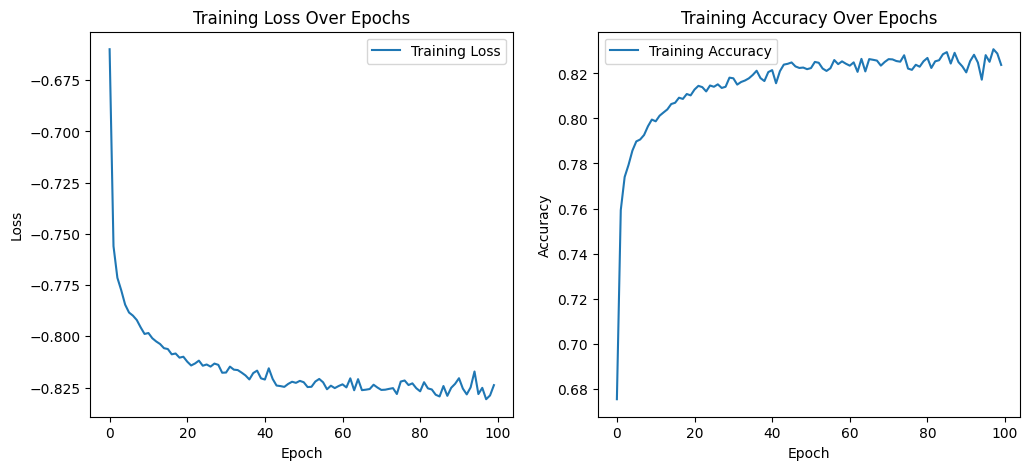

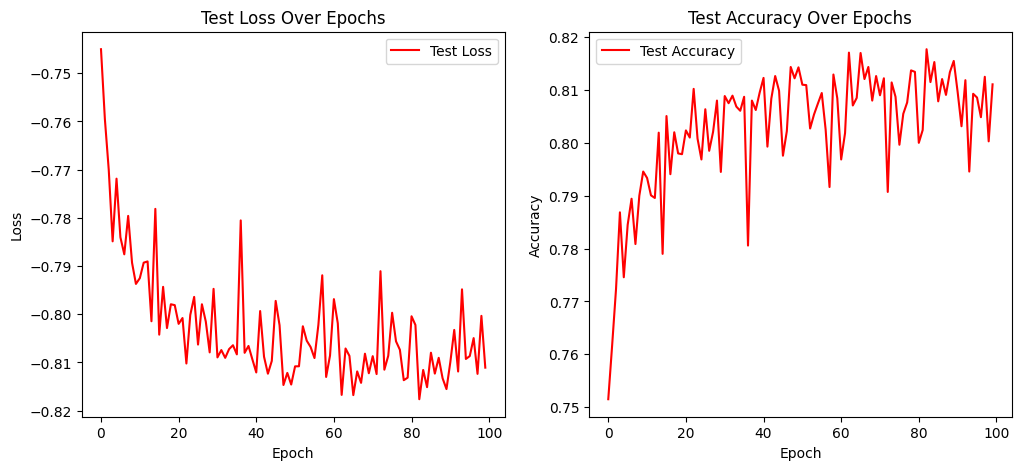

In [ ]:
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

# print nn parameters
total_params = sum(p.numel() for p in model_nn.parameters() if p.requires_grad)
print(f'Total number of parameters in the network: {total_params}')

# Plot the results
plt.figure(figsize=(12, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(12, 5))

# Plot Test Loss
plt.subplot(1, 2, 1)
plt.plot(test_losses, label='Test Loss', color='red')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='red')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Παρατηρούμε πως καθώς αυξάνεται ο αριθμός των εποχών η τιμή της συνάρτησης απώλειας μειώνεται και η τιμή της ακρίβειας αυξάνεται και για τα δύο σύνολα. Ωστόσο, η μια προσεγγίζει την άλλη καθώς Test Accuracy: 0.8111, Train Accuracy: 0.8238 και συγχρόνως Test Loss: -0.8111, Train Loss: -0.8238

## **[B]. (δεδομένα με την μορφή εικόνας)**

O  αριθμός των φίλτρων σε κάθε συνελικτικό επίπεδο επηρεάζει την επίδοση του δικτύου στα δεδομένα του συνόλου ελέγχου 
(testing set) με τους ακόλουθους τρόπους:
**Αύξηση της αποκεντρωτικότητας:** Ένας αυξημένος αριθμός φίλτρων συνεπάγεται περισσότερες ανεξάρτητες χαρακτηριστικές αναπαραστάσεις για κάθε συνελικτικό επίπεδο.

**Αύξηση της Υπολογιστικής Πολυπλοκότητας:** Αν και η αύξηση του αριθμού φίλτρων μπορεί να βελτιώσει την ακρίβεια του μοντέλου, μπορεί επίσης να αυξήσει την υπολογιστική πολυπλοκότητα. Αυτό οδηγεί σε μεγαλύτερο χρόνο εκπαίδευσης και μεγαλύτερες απαιτήσεις υπολογιστικού χώρου.  
Κατά συνέπεια, ο αριθμός των φίλτρων είναι ένας σημαντικός παράγοντας 
που πρέπει να λαμβάνεται υπόψη κατά την κατασκευή του CNN.

**Importing, Load and Preprocessing data**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [5]:
# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Building a Convolutional Neural Network**

In [6]:
# Define function to build CNN
def build_cnn(num_filters):
    model = Sequential()
    # Add first convolutional layer
    model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Add second convolutional layer
    model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu'))
    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output for the fully connected layer
    model.add(Flatten())
    # Add fully connected layer
    model.add(Dense(100, activation='relu'))
    # Add dropout layer
    model.add(Dropout(0.3))
    # Add output layer
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate(num_filters):
    model = build_cnn(num_filters)
    history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    return loss, val_loss, accuracy, val_accuracy

# Define different numbers of filters per layer
num_filters_list = [16, 32]

Παρακάτω φαίνονται τα διαγράμματα της συνάρτησης απώλειας και ακρίβειας και για τα δύο σύνολα για 16 και για 32 φίλτρα 
(εκπαίδευσης και ελέγχου).

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


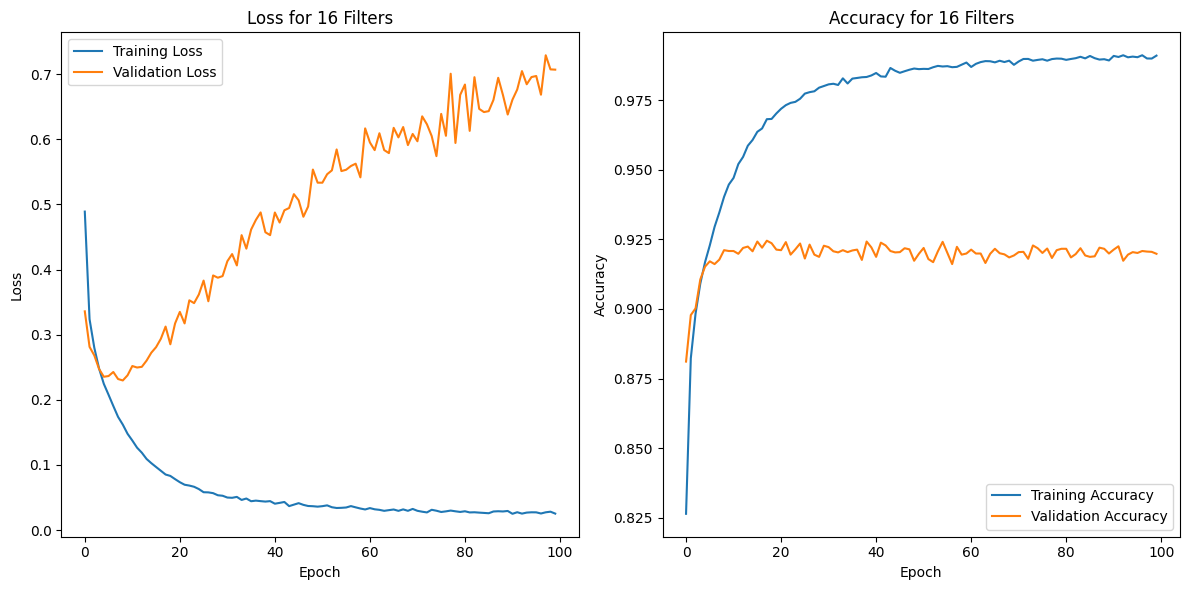

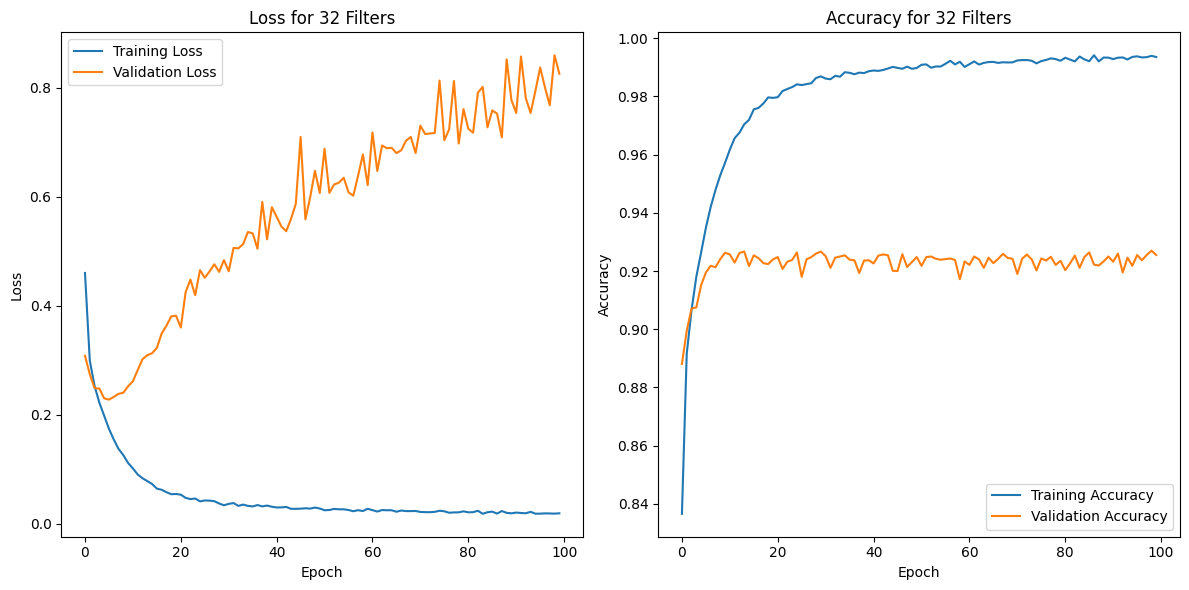

In [7]:
# Train and evaluate the models for different numbers of filters
for num_filters in num_filters_list:
    loss, val_loss, accuracy, val_accuracy = train_and_evaluate(num_filters)
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss for {} Filters'.format(num_filters))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy for {} Filters'.format(num_filters))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

Παρατηρούμε ότι γίνεται υπερεκπαίδευση στο νευρωνικό δίκτυο καθώς μετά τις 10 εποχές (είτε για 16 είτε για 32 πλήθος φίλτρων) το μόντελο παύει να έχει 
προβλεπτική ικανότητα για κάποιο καινούργιο δεδομένο, δηλαδή θα έπρεπε το Validation Loss να προσεγγίζει το Training Loss όπως επίσης και Training 
Accuracy θα έπρεπε να προσεγγίζει το Validation Accuracy. Επομένως, για διαφορετικές τιμές των παραμέτρων, πχ το dropout ή η ύπαρξη μιας early_stop 
συνθήκης, πιθανών να είχαμε καλύτερη εκπαίδευση. Συμπεραίνουμε, λοιπόν, πως η  βελτιστοποίηση των υπερπαραμέτρων του μοντέlου παίζει καθοριστικό ρόλο 
στην εκπαίδευση του.